In [165]:
# This analysis will mirror the objectives as outlined on the Kaggle Competition site, from which it was retrieved.  
# The objective of this analysis is to be able to predict the QuoteConversion_Flag for each QuoteNumber in the dataset.  
# Data is available at the following location:  https://www.kaggle.com/c/homesite-quote-conversion/data

# Author: Anthony Fiel
# GA Data Science Online Course

In [166]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Display plots in-notebook
%matplotlib inline

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

pd.set_option('display.max_columns', None)

# Read in data files
data = 'train.csv'
predict_data = 'test.csv'

ins_data = pd.read_csv(data)
prediction_data = pd.read_csv(predict_data)

In [167]:
ins_data.head()

,QuoteNumber,Original_Quote_Date,QuoteConversion_Flag,Field6,Field7,Field8,Field9,Field10,Field11,Field12,CoverageField1A,CoverageField1B,CoverageField2A,CoverageField2B,CoverageField3A,CoverageField3B,CoverageField4A,CoverageField4B,CoverageField5A,CoverageField5B,CoverageField6A,CoverageField6B,CoverageField8,CoverageField9,CoverageField11A,CoverageField11B,SalesField1A,SalesField1B,SalesField2A,SalesField2B,SalesField3,SalesField4,SalesField5,SalesField6,SalesField7,SalesField8,SalesField9,SalesField10,SalesField11,SalesField12,SalesField13,SalesField14,SalesField15,PersonalField1,PersonalField2,PersonalField4A,PersonalField4B,PersonalField5,PersonalField6,PersonalField7,PersonalField8,PersonalField9,PersonalField10A,PersonalField10B,PersonalField11,PersonalField12,PersonalField13,PersonalField14,PersonalField15,PersonalField16,PersonalField17,PersonalField18,PersonalField19,PersonalField22,PersonalField23,PersonalField24,PersonalField25,PersonalField26,PersonalField27,PersonalField28,PersonalField29,PersonalField30,PersonalField31,PersonalField32,PersonalField33,PersonalField34,PersonalField35,PersonalField36,PersonalField37,PersonalField38,PersonalField39,PersonalField40,PersonalField41,PersonalField42,PersonalField43,PersonalField44,PersonalField45,PersonalField46,PersonalField47,PersonalField48,PersonalField49,PersonalField50,PersonalField51,PersonalField52,PersonalField53,PersonalField54,PersonalField55,PersonalField56,PersonalField57,PersonalField58,PersonalField59,PersonalField60,PersonalField61,PersonalField62,PersonalField63,PersonalField64,PersonalField65,PersonalField66,PersonalField67,PersonalField68,PersonalField69,PersonalField70,PersonalField71,PersonalField72,PersonalField73,PersonalField74,PersonalField75,PersonalField76,PersonalField77,PersonalField78,PersonalField79,PersonalField80,PersonalField81,PersonalField82,PersonalField83,PersonalField84,PropertyField1A,PropertyField1B,PropertyField2A,PropertyField2B,PropertyField3,PropertyField4,PropertyField5,PropertyField6,PropertyField7,PropertyField8,PropertyField9,PropertyField10,PropertyField11A,PropertyField11B,PropertyField12,PropertyField13,PropertyField14,PropertyField15,PropertyField16A,PropertyField16B,PropertyField17,PropertyField18,PropertyField19,PropertyField20,PropertyField21A,PropertyField21B,PropertyField22,PropertyField23,PropertyField24A,PropertyField24B,PropertyField25,PropertyField26A,PropertyField26B,PropertyField27,PropertyField28,PropertyField29,PropertyField30,PropertyField31,PropertyField32,PropertyField33,PropertyField34,PropertyField35,PropertyField36,PropertyField37,PropertyField38,PropertyField39A,PropertyField39B,GeographicField1A,GeographicField1B,GeographicField2A,GeographicField2B,GeographicField3A,GeographicField3B,GeographicField4A,GeographicField4B,GeographicField5A,GeographicField5B,GeographicField6A,GeographicField6B,GeographicField7A,GeographicField7B,GeographicField8A,GeographicField8B,GeographicField9A,GeographicField9B,GeographicField10A,GeographicField10B,GeographicField11A,GeographicField11B,GeographicField12A,GeographicField12B,GeographicField13A,GeographicField13B,GeographicField14A,GeographicField14B,GeographicField15A,GeographicField15B,GeographicField16A,GeographicField16B,GeographicField17A,GeographicField17B,GeographicField18A,GeographicField18B,GeographicField19A,GeographicField19B,GeographicField20A,GeographicField20B,GeographicField21A,GeographicField21B,GeographicField22A,GeographicField22B,GeographicField23A,GeographicField23B,GeographicField24A,GeographicField24B,GeographicField25A,GeographicField25B,GeographicField26A,GeographicField26B,GeographicField27A,GeographicField27B,GeographicField28A,GeographicField28B,GeographicField29A,GeographicField29B,GeographicField30A,GeographicField30B,GeographicField31A,GeographicField31B,GeographicField32A,GeographicField32B,GeographicField33A,GeographicField33B,GeographicField34A,GeographicField34B,GeographicField35A,GeographicField35B,GeographicField36A,GeographicFie

In [168]:
# Find columns that have NULL values in the data
ins_data.columns[ins_data.isnull().any()]

Index(['PersonalField7', 'PersonalField84', 'PropertyField3', 'PropertyField4',
       'PropertyField29', 'PropertyField32', 'PropertyField34',
       'PropertyField36', 'PropertyField38'],
      dtype='object')

In [169]:
ins_data.PersonalField7.value_counts(dropna = False)

N      259379
Y        1261
NaN       113
Name: PersonalField7, dtype: int64

In [170]:
ins_data.PersonalField84.value_counts(dropna = False)

2.0    134906
NaN    124208
1.0      1564
5.0        62
3.0         7
7.0         3
4.0         2
8.0         1
Name: PersonalField84, dtype: int64

In [171]:
ins_data.PropertyField3.value_counts(dropna = False)

N      226966
Y       33706
NaN        81
Name: PropertyField3, dtype: int64

In [172]:
ins_data.PropertyField4.value_counts(dropna = False)

N      226223
Y       34467
NaN        63
Name: PropertyField4, dtype: int64

In [173]:
ins_data.PropertyField29.value_counts(dropna = False)

NaN    200685
0.0     60056
1.0        12
Name: PropertyField29, dtype: int64

In [174]:
ins_data.PropertyField32.value_counts(dropna = False)

Y      191627
N       69056
NaN        70
Name: PropertyField32, dtype: int64

In [175]:
ins_data.PropertyField34.value_counts(dropna = False)

Y      141185
N      119498
NaN        70
Name: PropertyField34, dtype: int64

In [176]:
ins_data.PropertyField36.value_counts(dropna = False)

N      248302
Y       12338
NaN       113
Name: PropertyField36, dtype: int64

In [177]:
ins_data.PropertyField38.value_counts(dropna = False)

N      254032
Y        5501
NaN      1220
Name: PropertyField38, dtype: int64

In [178]:
# Drop this field as it has too many NULL values
ins_data.drop(columns=['PersonalField84'],inplace = True)

In [179]:
# Impute missing data with the mode of that column
ins_data['PersonalField7'].fillna(ins_data['PersonalField7'].mode()[0], inplace=True)
ins_data['PropertyField3'].fillna(ins_data['PropertyField3'].mode()[0], inplace=True)
ins_data['PropertyField4'].fillna(ins_data['PropertyField4'].mode()[0], inplace=True)
ins_data['PropertyField29'].fillna(ins_data['PropertyField29'].mode()[0], inplace=True)
ins_data['PropertyField32'].fillna(ins_data['PropertyField32'].mode()[0], inplace=True)
ins_data['PropertyField34'].fillna(ins_data['PropertyField34'].mode()[0], inplace=True)
ins_data['PropertyField36'].fillna(ins_data['PropertyField36'].mode()[0], inplace=True)
ins_data['PropertyField38'].fillna(ins_data['PropertyField38'].mode()[0], inplace=True)

In [180]:
# Find what datatypes we have in the data
ins_data.dtypes.value_counts()

int64      265
object      28
float64      5
dtype: int64

In [181]:
# Isolate non-numeric columns
ins_data.select_dtypes(include='object').columns

Index(['Original_Quote_Date', 'Field6', 'Field10', 'Field12', 'CoverageField8',
       'CoverageField9', 'SalesField7', 'PersonalField7', 'PersonalField16',
       'PersonalField17', 'PersonalField18', 'PersonalField19',
       'PropertyField3', 'PropertyField4', 'PropertyField5', 'PropertyField7',
       'PropertyField14', 'PropertyField28', 'PropertyField30',
       'PropertyField31', 'PropertyField32', 'PropertyField33',
       'PropertyField34', 'PropertyField36', 'PropertyField37',
       'PropertyField38', 'GeographicField63', 'GeographicField64'],
      dtype='object')

In [182]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical fields to numeric value
le_Field6 = LabelEncoder()
le_Field10 = LabelEncoder()
le_CoverageField8 = LabelEncoder()
le_CoverageField9 = LabelEncoder()
le_SalesField7 = LabelEncoder()
le_PersonalField16 = LabelEncoder()
le_PersonalField17 = LabelEncoder()
le_PersonalField18 = LabelEncoder()
le_PersonalField19 = LabelEncoder()
le_PropertyField7 = LabelEncoder()
le_PropertyField14 = LabelEncoder()
le_PropertyField28 = LabelEncoder()
le_PropertyField31 = LabelEncoder()
le_PropertyField33 = LabelEncoder()

ins_data['Field6'] = le_Field6.fit_transform(ins_data['Field6'])
ins_data['Field10'] = le_Field10.fit_transform(ins_data['Field10'])
ins_data['CoverageField8'] = le_CoverageField8.fit_transform(ins_data['CoverageField8'])
ins_data['CoverageField9'] = le_CoverageField9.fit_transform(ins_data['CoverageField9'])
ins_data['SalesField7'] = le_SalesField7.fit_transform(ins_data['SalesField7'])
ins_data['PersonalField16'] = le_PersonalField16.fit_transform(ins_data['PersonalField16'])
ins_data['PersonalField17'] = le_PersonalField17.fit_transform(ins_data['PersonalField17'])
ins_data['PersonalField18'] = le_PersonalField18.fit_transform(ins_data['PersonalField18'])
ins_data['PersonalField19'] = le_PersonalField19.fit_transform(ins_data['PersonalField19'])
ins_data['PropertyField7'] = le_PropertyField7.fit_transform(ins_data['PropertyField7'])
ins_data['PropertyField14'] = le_PropertyField14.fit_transform(ins_data['PropertyField14'])
ins_data['PropertyField28'] = le_PropertyField28.fit_transform(ins_data['PropertyField28'])
ins_data['PropertyField31'] = le_PropertyField31.fit_transform(ins_data['PropertyField31'])
ins_data['PropertyField33'] = le_PropertyField33.fit_transform(ins_data['PropertyField33'])

In [183]:
# Map Y/N fields to 1 and 0
ins_data['Field12'] = ins_data.Field12.map({'Y':1, 'N':0})
ins_data['PersonalField7'] = ins_data.PersonalField7.map({'Y':1, 'N':0})
ins_data['PropertyField3'] = ins_data.PropertyField3.map({'Y':1, 'N':0})
ins_data['PropertyField4'] = ins_data.PropertyField4.map({'Y':1, 'N':0})
ins_data['PropertyField5'] = ins_data.PropertyField5.map({'Y':1, 'N':0})
ins_data['PropertyField30'] = ins_data.PropertyField30.map({'Y':1, 'N':0})
ins_data['PropertyField32'] = ins_data.PropertyField32.map({'Y':1, 'N':0})
ins_data['PropertyField34'] = ins_data.PropertyField34.map({'Y':1, 'N':0})
ins_data['PropertyField36'] = ins_data.PropertyField36.map({'Y':1, 'N':0})
ins_data['PropertyField37'] = ins_data.PropertyField37.map({'Y':1, 'N':0})
ins_data['PropertyField38'] = ins_data.PropertyField38.map({'Y':1, 'N':0})
ins_data['GeographicField63'] = ins_data.GeographicField63.map({'Y':1, 'N':0})

In [184]:
# Create dummy variables for GeographicField64 field and drop 1
geo_dummies = pd.get_dummies(ins_data.GeographicField64, prefix='geo').iloc[:, 1:]

# Concatenate dummy fields to the dataset
ins_data = pd.concat([ins_data, geo_dummies], axis=1)
ins_data.drop(columns=['GeographicField64'],inplace = True)
ins_data.drop(columns=['Original_Quote_Date'],inplace = True)

In [185]:
# Find what datatypes we have in the data
ins_data.dtypes.value_counts()

int64      276
int32       14
float64      6
uint8        3
dtype: int64

In [186]:
# find the highest/lowest correlated values in regards to the response variable
ins_data.corr().QuoteConversion_Flag.sort_values()

SalesField5            -0.350335
SalesField1B           -0.253347
PersonalField9         -0.252054
SalesField1A           -0.217625
SalesField4            -0.217373
                          ...   
PropertyField32         0.192496
PropertyField34         0.213861
QuoteConversion_Flag    1.000000
PropertyField6               NaN
GeographicField10A           NaN
Name: QuoteConversion_Flag, Length: 299, dtype: float64

In [187]:
ins_data.corr().QuoteConversion_Flag.sort_values().tail(8)

CoverageField8          0.178042
Field9                  0.179569
PropertyField35         0.187117
PropertyField32         0.192496
PropertyField34         0.213861
QuoteConversion_Flag    1.000000
PropertyField6               NaN
GeographicField10A           NaN
Name: QuoteConversion_Flag, dtype: float64

In [188]:
# Define the desired features for modelling 
feature_cols = ['SalesField5','SalesField1B','PersonalField9','SalesField1A','SalesField4','Field9','PropertyField35','PropertyField32','PropertyField34','CoverageField8']

X = ins_data[feature_cols]
y = ins_data.QuoteConversion_Flag

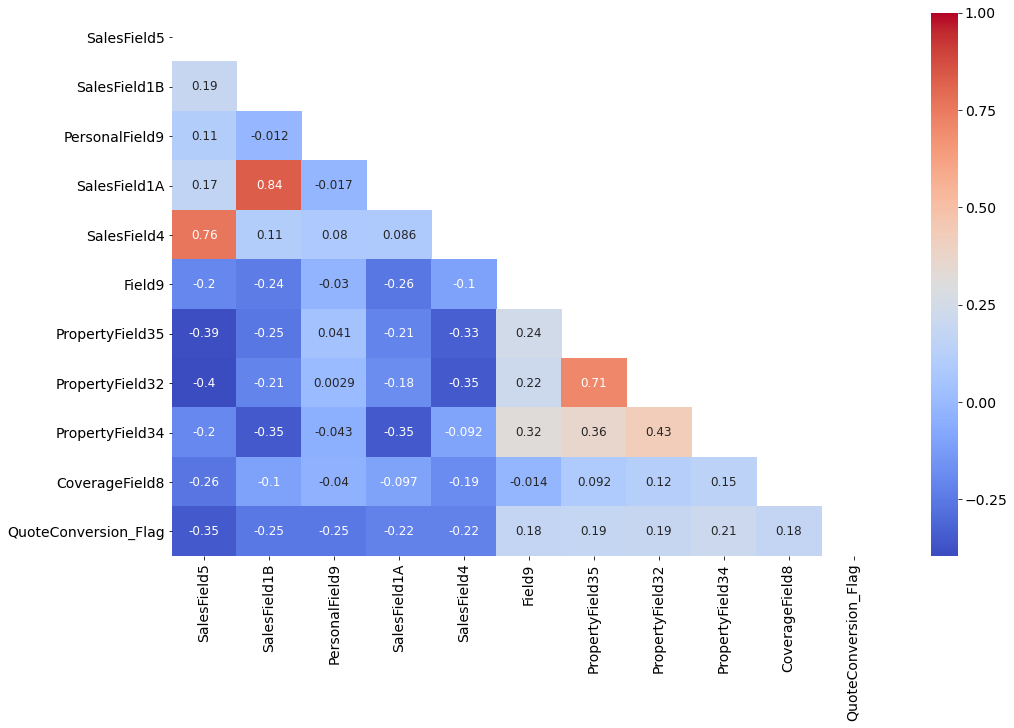

In [189]:
# Store temp data frame for analysis
Z = pd.concat([X, y], axis=1)

# Create heatmap to view relationship with selected features and response variable
mask = np.zeros_like(Z.corr());
triangle_indices = np.triu_indices_from(mask);
mask[triangle_indices]= True
plt.figure(figsize=(16, 10));
sns.heatmap(Z.corr(), mask=mask, annot=True, cmap='coolwarm', annot_kws={'size': 12});

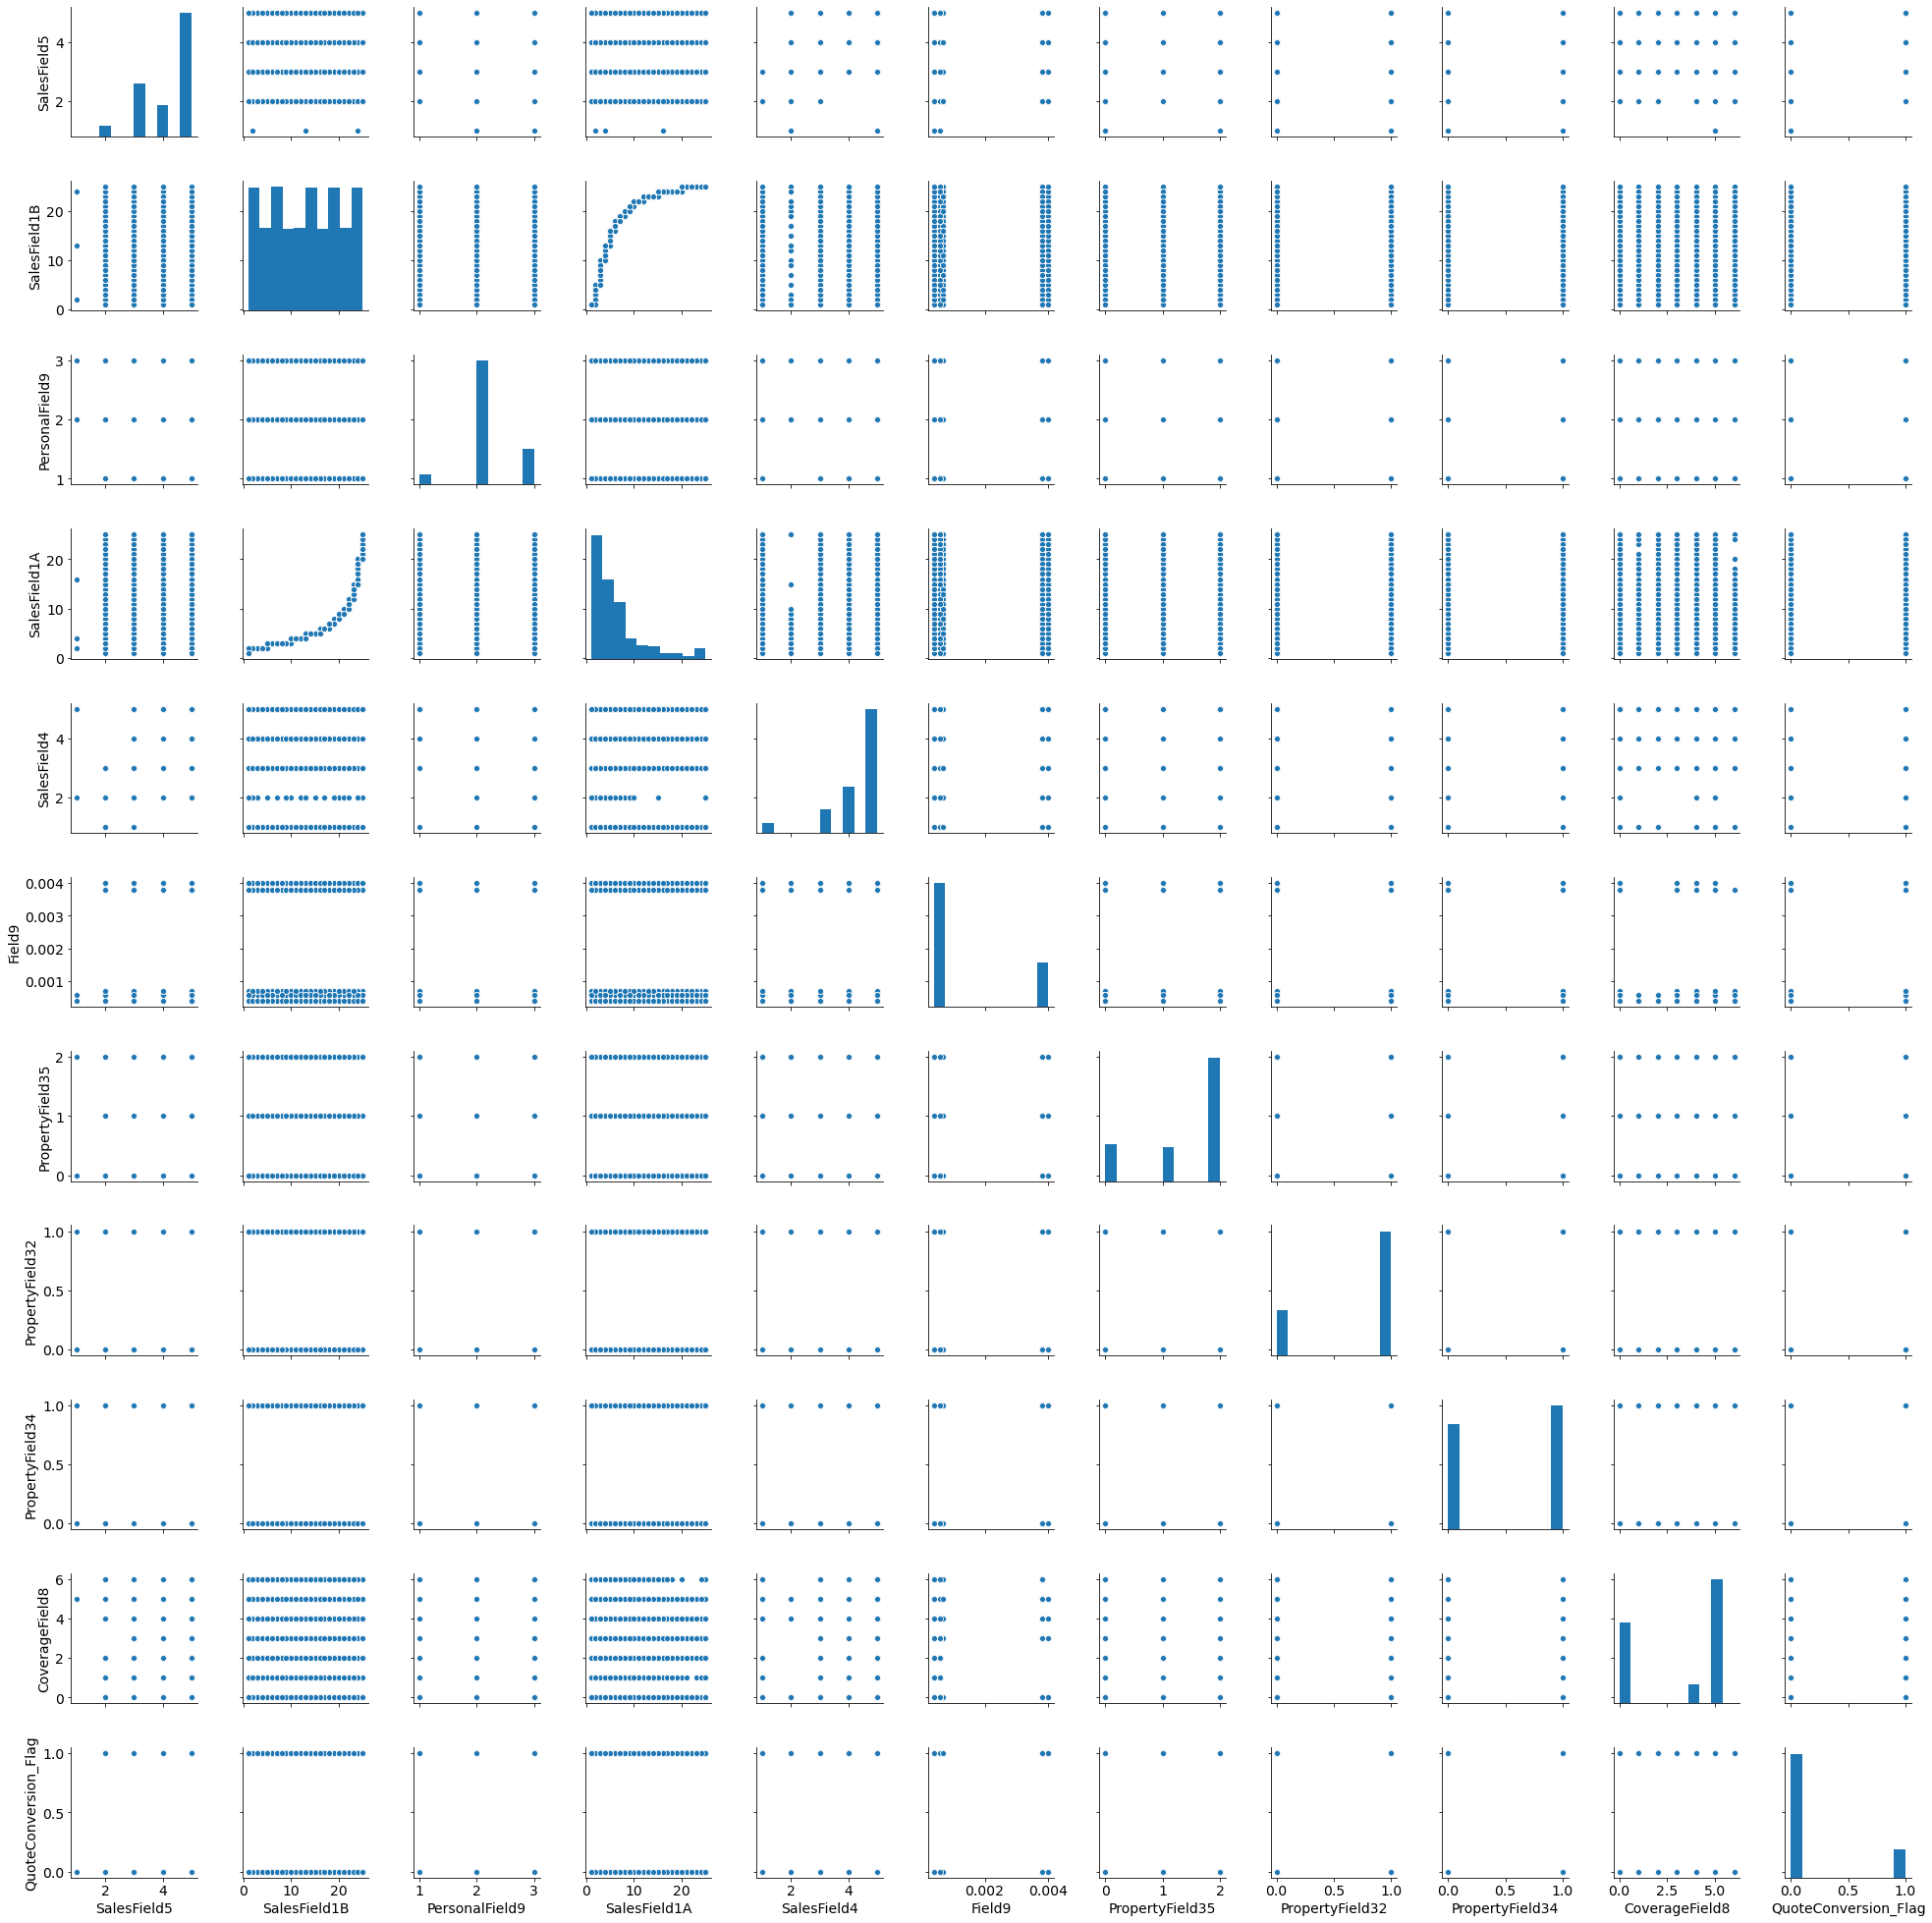

In [190]:
sns.pairplot(Z);

<h3>Preliminary EDA Findings</h3>

The data for this project has been masked so it provides some challenges on feature selection and meaning.  Normally domain knowledge would assist in feature selection, but this will be limited to only to numeric proceses.  The first steps in data preparation were to remove any NULL data and prep for modeling.  This is needed in order to compare the effect of the possible selected features to the reponse variable.  

My initial thoughts were to take the top and bottom 5 correlated features in order to model upon, but may leave in all features and approch with a random forest model in order to assist with feature selection.  

The initial findings, shown on the heatmap and pairplot show that SalesField1A and SalesField1B show high colinearity and exponential growth in regards to eachother;though in order to drive any business decisions from this would require an unmasked dictionary.  

I look forward to any questions you may have.

<h3>First Modeling attempt will be to use KNN model</h3>


In [191]:
# Split into training and test data with 80/20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=99)

In [192]:
# Get Baseline from most frequent class
most_freq_class = y_train.value_counts().index[0]

print(y_train.value_counts())
most_freq_class

0    169375
1     39227
Name: QuoteConversion_Flag, dtype: int64


0

In [193]:
# Computing the NULL accuracy will let us know if our model performs better than baseline.
y_test.value_counts()[most_freq_class] / len(y_test)

0.8146344269525033

In [194]:
# Create a loop that goes through n_neighbors from 1 to 100 to see which number gives highest score
scores = []
for k in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    score = float(sum(pred == y_test)) / len(y_test)
    scores.append([k, score])

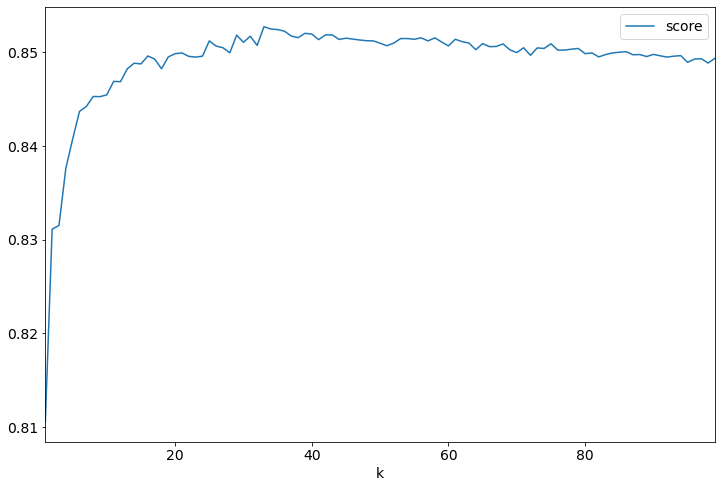

In [195]:
data = pd.DataFrame(scores,columns=['k','score'])
data.plot.line(x='k',y='score',figsize=(12,8));

In [196]:
scores
# From here we can see that our highest accuracy comes at a k of 33

[[1, 0.8105501332668597],
 [2, 0.8311058273091599],
 [3, 0.8315085041514065],
 [4, 0.8375870069605569],
 [5, 0.8407125462598991],
 [6, 0.8436655097697072],
 [7, 0.8441832371383099],
 [8, 0.8452570420509674],
 [9, 0.8452378669632413],
 [10, 0.8454296178405016],
 [11, 0.8468677494199536],
 [12, 0.8468293992445015],
 [13, 0.8482100055607754],
 [14, 0.8488044332802822],
 [15, 0.8487277329293782],
 [16, 0.8495714367893233],
 [17, 0.8492454602979809],
 [18, 0.8482100055607754],
 [19, 0.8494755613506931],
 [20, 0.8498207129297617],
 [21, 0.8498974132806658],
 [22, 0.8495330866138713],
 [23, 0.8494563862629672],
 [24, 0.8495522617015973],
 [25, 0.8511821441583095],
 [26, 0.8506260666142548],
 [27, 0.8504534908247205],
 [28, 0.8499165883683918],
 [29, 0.8517957469655424],
 [30, 0.8510287434565014],
 [31, 0.8516806964391862],
 [32, 0.8507027669651589],
 [33, 0.8526969760886656],
 [34, 0.8524476999482272],
 [35, 0.8523901746850492],
 [36, 0.852217598895515],
 [37, 0.8516998715269123],
 [38, 0.851

In [197]:
# Fit the model using highest scoring number of neighbors 
knn = KNeighborsClassifier(n_neighbors=33)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=33, p=2,
                     weights='uniform')

In [198]:
y_pred_class = knn.predict(X_test)
print("KNN Accuracy: ",(metrics.accuracy_score(y_test, y_pred_class)))

KNN Accuracy:  0.8526969760886656


In [199]:
# Use confusion matrix to check results
from sklearn import metrics

cm = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred_class > .5)
cm

array([[39859,  2625],
       [ 5057,  4610]], dtype=int64)

In [200]:
cm_precision = cm[1][1] / (cm[0][1] + cm[1][1])
recall = cm[1][1] / (cm[1][0] + cm[1][1])

print("Precision: ", cm_precision)
print("Recall: ", recall)

Precision:  0.6371803731859018
Recall:  0.47688010758249716


<h3>Model using random forest</h3>

In [201]:
#For Random forest we will begin using full dataset in order to get a list of important features
idata = ins_data.drop(['QuoteConversion_Flag','QuoteNumber'],axis=1)
idata['GeographicField63'].fillna(idata['GeographicField63'].mode()[0], inplace=True)

fX_train, fX_test, fy_train, fy_test = train_test_split(idata, y,test_size=0.2, random_state=99)

In [202]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(criterion='gini',random_state=99)

clf.fit(fX_train, fy_train)
y_pred=clf.predict(fX_test)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [203]:
# Print Accuracy Score of Random forest model
print("Accuracy: ", metrics.accuracy_score(fy_test, y_pred))

Accuracy:  0.9047189890893751


In [204]:
# Confusion Matrix for Random Forest
cm_rf = metrics.confusion_matrix(y_true=fy_test, y_pred=y_pred > .5)
cm_rf

array([[41420,  1064],
       [ 3905,  5762]], dtype=int64)

In [205]:
cm_precision = cm_rf[1][1] / (cm_rf[0][1] + cm_rf[1][1])
recall = cm_rf[1][1] / (cm_rf[1][0] + cm_rf[1][1])

print("Precision: ", cm_precision)
print("Recall: ", recall)

Precision:  0.8441254028713742
Recall:  0.5960484121237198


In [206]:
#Find feature importance
feature_imp = pd.Series(clf.feature_importances_,index=idata.columns).sort_values(ascending=False)
feature_imp.head(30)

PropertyField37       0.127856
SalesField5           0.040959
SalesField4           0.034343
PersonalField10A      0.031584
PersonalField10B      0.031100
PersonalField12       0.026425
PersonalField9        0.025751
SalesField1B          0.017143
CoverageField9        0.016621
PersonalField1        0.015309
Field7                0.012295
Field10               0.011147
PersonalField13       0.010700
SalesField1A          0.010412
PersonalField4A       0.009683
PersonalField4B       0.009201
CoverageField11B      0.008976
CoverageField8        0.007601
PersonalField2        0.007375
SalesField6           0.006535
SalesField8           0.006417
CoverageField11A      0.006274
SalesField2B          0.006009
PropertyField34       0.005819
GeographicField7B     0.005588
GeographicField9B     0.005524
PropertyField35       0.005375
GeographicField13B    0.005284
PropertyField2B       0.005276
PropertyField39B      0.004669
dtype: float64

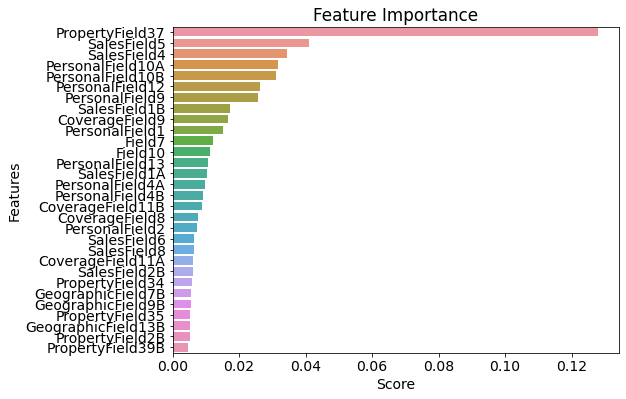

In [207]:
# Creating a bar plot for top 30 features
sns.barplot(x=feature_imp.head(30), y=feature_imp.head(30).index)

plt.xlabel('Score')
plt.ylabel('Features')
plt.title("Feature Importance")
plt.show()

In [208]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(clf, threshold='mean')

sfm.fit(fX_train, fy_train)

fX_important_train = sfm.transform(fX_train)
fX_important_test = sfm.transform(fX_test)

In [209]:
# Show the difference in number of features using importance greater than the mean
print(fX_train.shape)
print(fX_important_train.shape)

# New model has 226 fewer features

(208602, 297)
(208602, 71)


In [210]:
# Re-train the model using limited feature set
clf_important = RandomForestClassifier(criterion='gini',random_state=99)

clf_important.fit(fX_important_train, fy_train)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=99, verbose=0,
                       warm_start=False)

In [211]:
# Recall Accuracy of Full model
print("Full feature Accuracy: ", metrics.accuracy_score(fy_test, y_pred))

# Predict using limited featrure model
y_important_pred = clf_important.predict(fX_important_test)

# View The Accuracy Of Our Limited Feature Model
print("Limited Feature Accuracy: ", metrics.accuracy_score(fy_test, y_important_pred))

Full feature Accuracy:  0.9047189890893751
Limited Feature Accuracy:  0.9118329466357309


In [212]:
# Show confusion Matrix for limited feature set
cm_rf2 = metrics.confusion_matrix(y_true=fy_test, y_pred=y_important_pred > .5)
cm_rf2

array([[41428,  1056],
       [ 3542,  6125]], dtype=int64)

In [213]:
cm_precision = cm_rf2[1][1] / (cm_rf2[0][1] + cm_rf2[1][1])
recall = cm_rf2[1][1] / (cm_rf2[1][0] + cm_rf2[1][1])

print("Precision: ", cm_precision)
print("Recall: ", recall)

Precision:  0.8529452722462053
Recall:  0.6335988414192614


<h3> We now need to transform the prediction data the same way as our test data </h3>

In [214]:
prediction_data.PersonalField7.value_counts(dropna = False)

N      172973
Y         794
NaN        69
Name: PersonalField7, dtype: int64

In [215]:
prediction_data.PersonalField84.value_counts(dropna = False)

2.0    89941
NaN    82812
1.0     1028
5.0       45
3.0        9
7.0        1
Name: PersonalField84, dtype: int64

In [216]:
prediction_data.PropertyField3.value_counts(dropna = False)

N      151235
Y       22532
NaN        69
Name: PropertyField3, dtype: int64

In [217]:
prediction_data.PropertyField4.value_counts(dropna = False)

N      150644
Y       23140
NaN        52
Name: PropertyField4, dtype: int64

In [218]:
prediction_data.PropertyField29.value_counts(dropna = False)

NaN     133945
0.0      39879
1.0         10
10.0         2
Name: PropertyField29, dtype: int64

In [219]:
prediction_data.PropertyField32.value_counts(dropna = False)

Y      128082
N       45713
NaN        41
Name: PropertyField32, dtype: int64

In [220]:
prediction_data.PropertyField34.value_counts(dropna = False)

Y      93784
N      80011
NaN       41
Name: PropertyField34, dtype: int64

In [221]:
prediction_data.PropertyField36.value_counts(dropna = False)

N      165619
Y        8150
NaN        67
Name: PropertyField36, dtype: int64

In [222]:
prediction_data.PropertyField38.value_counts(dropna = False)

N      169171
Y        3819
NaN       846
Name: PropertyField38, dtype: int64

In [223]:
prediction_data.PropertyField37.value_counts(dropna = False)

N    123759
Y     50076
          1
Name: PropertyField37, dtype: int64

In [224]:
prediction_data.PropertyField30.value_counts(dropna = False)   

N      164135
Y        9700
NaN         1
Name: PropertyField30, dtype: int64

In [225]:
prediction_data.GeographicField63.value_counts(dropna = False)

N    169855
Y      3980
          1
Name: GeographicField63, dtype: int64

In [226]:
prediction_data.PropertyField5.value_counts(dropna = False)   

Y      173768
N          67
NaN         1
Name: PropertyField5, dtype: int64

In [227]:
# Drop this field as it has too many NULL values
prediction_data.drop(columns=['PersonalField84'],inplace = True)

In [228]:
# Impute missing data with the mode of that column
prediction_data['PersonalField7'].fillna(prediction_data['PersonalField7'].mode()[0], inplace=True)
prediction_data['PropertyField3'].fillna(prediction_data['PropertyField3'].mode()[0], inplace=True)
prediction_data['PropertyField4'].fillna(prediction_data['PropertyField4'].mode()[0], inplace=True)
prediction_data['PropertyField29'].fillna(prediction_data['PropertyField29'].mode()[0], inplace=True)
prediction_data['PropertyField32'].fillna(prediction_data['PropertyField32'].mode()[0], inplace=True)
prediction_data['PropertyField34'].fillna(prediction_data['PropertyField34'].mode()[0], inplace=True)
prediction_data['PropertyField36'].fillna(prediction_data['PropertyField36'].mode()[0], inplace=True)
prediction_data['PropertyField38'].fillna(prediction_data['PropertyField38'].mode()[0], inplace=True)
prediction_data['PropertyField37'].fillna(prediction_data['PropertyField37'].mode()[0], inplace=True)
prediction_data['PropertyField30'].fillna(prediction_data['PropertyField30'].mode()[0], inplace=True)
prediction_data['GeographicField63'].fillna(prediction_data['GeographicField63'].mode()[0], inplace=True)
prediction_data['PropertyField5'].fillna(prediction_data['PropertyField5'].mode()[0], inplace=True)

In [229]:
# Find what datatypes we have in the data
prediction_data.dtypes.value_counts()

int64      264
object      28
float64      5
dtype: int64

In [230]:
# Isolate non-numeric columns
prediction_data.select_dtypes(include='object').columns

Index(['Original_Quote_Date', 'Field6', 'Field10', 'Field12', 'CoverageField8',
       'CoverageField9', 'SalesField7', 'PersonalField7', 'PersonalField16',
       'PersonalField17', 'PersonalField18', 'PersonalField19',
       'PropertyField3', 'PropertyField4', 'PropertyField5', 'PropertyField7',
       'PropertyField14', 'PropertyField28', 'PropertyField30',
       'PropertyField31', 'PropertyField32', 'PropertyField33',
       'PropertyField34', 'PropertyField36', 'PropertyField37',
       'PropertyField38', 'GeographicField63', 'GeographicField64'],
      dtype='object')

In [231]:
prediction_data['Field6'] = le_Field6.fit_transform(prediction_data['Field6'])
prediction_data['Field10'] = le_Field10.fit_transform(prediction_data['Field10'])
prediction_data['CoverageField8'] = le_CoverageField8.fit_transform(prediction_data['CoverageField8'])
prediction_data['CoverageField9'] = le_CoverageField9.fit_transform(prediction_data['CoverageField9'])
prediction_data['SalesField7'] = le_SalesField7.fit_transform(prediction_data['SalesField7'])
prediction_data['PersonalField16'] = le_PersonalField16.fit_transform(prediction_data['PersonalField16'])
prediction_data['PersonalField17'] = le_PersonalField17.fit_transform(prediction_data['PersonalField17'])
prediction_data['PersonalField18'] = le_PersonalField18.fit_transform(prediction_data['PersonalField18'])
prediction_data['PersonalField19'] = le_PersonalField19.fit_transform(prediction_data['PersonalField19'])
prediction_data['PropertyField7'] = le_PropertyField7.fit_transform(prediction_data['PropertyField7'])
prediction_data['PropertyField14'] = le_PropertyField14.fit_transform(prediction_data['PropertyField14'])
prediction_data['PropertyField28'] = le_PropertyField28.fit_transform(prediction_data['PropertyField28'])
prediction_data['PropertyField31'] = le_PropertyField31.fit_transform(prediction_data['PropertyField31'])
prediction_data['PropertyField33'] = le_PropertyField33.fit_transform(prediction_data['PropertyField33'])

In [232]:
# Map Y/N fields to 1 and 0
prediction_data['Field12'] = prediction_data.Field12.map({'Y':1, 'N':0})
prediction_data['PersonalField7'] = prediction_data.PersonalField7.map({'Y':1, 'N':0})
prediction_data['PropertyField3'] = prediction_data.PropertyField3.map({'Y':1, 'N':0})
prediction_data['PropertyField4'] = prediction_data.PropertyField4.map({'Y':1, 'N':0})
prediction_data['PropertyField5'] = prediction_data.PropertyField5.map({'Y':1, 'N':0})
prediction_data['PropertyField30'] = prediction_data.PropertyField30.map({'Y':1, 'N':0})
prediction_data['PropertyField32'] = prediction_data.PropertyField32.map({'Y':1, 'N':0})
prediction_data['PropertyField34'] = prediction_data.PropertyField34.map({'Y':1, 'N':0})
prediction_data['PropertyField36'] = prediction_data.PropertyField36.map({'Y':1, 'N':0})
prediction_data['PropertyField37'] = prediction_data.PropertyField37.map({'Y':1, 'N':0})
prediction_data['PropertyField38'] = prediction_data.PropertyField38.map({'Y':1, 'N':0})
prediction_data['GeographicField63'] = prediction_data.GeographicField63.map({'Y':1, 'N':0})

In [233]:
# Impute missing data with the mode of that column
prediction_data['PersonalField7'].fillna(prediction_data['PersonalField7'].mode()[0], inplace=True)
prediction_data['PropertyField3'].fillna(prediction_data['PropertyField3'].mode()[0], inplace=True)
prediction_data['PropertyField4'].fillna(prediction_data['PropertyField4'].mode()[0], inplace=True)
prediction_data['PropertyField29'].fillna(prediction_data['PropertyField29'].mode()[0], inplace=True)
prediction_data['PropertyField32'].fillna(prediction_data['PropertyField32'].mode()[0], inplace=True)
prediction_data['PropertyField34'].fillna(prediction_data['PropertyField34'].mode()[0], inplace=True)
prediction_data['PropertyField36'].fillna(prediction_data['PropertyField36'].mode()[0], inplace=True)
prediction_data['PropertyField38'].fillna(prediction_data['PropertyField38'].mode()[0], inplace=True)
prediction_data['PropertyField37'].fillna(prediction_data['PropertyField37'].mode()[0], inplace=True)
prediction_data['PropertyField30'].fillna(prediction_data['PropertyField30'].mode()[0], inplace=True)
prediction_data['GeographicField63'].fillna(prediction_data['GeographicField63'].mode()[0], inplace=True)
prediction_data['PropertyField5'].fillna(prediction_data['PropertyField5'].mode()[0], inplace=True)

In [234]:
# Create dummy variables for GeographicField64 field and drop 1
geo_dummies = pd.get_dummies(prediction_data.GeographicField64, prefix='geo').iloc[:, 1:]

# Concatenate dummy fields to the dataset
prediction_data = pd.concat([prediction_data, geo_dummies], axis=1)
prediction_data.drop(columns=['GeographicField64'],inplace = True)
prediction_data.drop(columns=['Original_Quote_Date'],inplace = True)

In [235]:
# Convert the transformed prediction data
pred_X = prediction_data.drop(['QuoteNumber'],axis=1)
X_final = sfm.transform(pred_X)

# Generate Prediction
pred_final = clf_important.predict(X_final)
pf = pd.DataFrame(pred_final)
quote_num = prediction_data.QuoteNumber
final = pd.concat([quote_num, pf], axis=1)

In [236]:
# Outcome of predicting the submission dataset
final.rename(columns={"QuoteNumber": "QuoteNumber", 0: "Prediction"},inplace=True)
final

,QuoteNumber,Prediction
0,3,0
1,5,0
2,7,0
3,9,0
4,10,0
...,...,...
173831,434570,0
173832,434573,0
173833,434574,1
173834,434575,0
